In [6]:
from py2neo import Graph
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
%matplotlib inline

In [4]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "admin"))

In [66]:
result=graph.run("MATCH (n:Person) RETURN count(n)").to_data_frame()

<py2neo.client.bolt.BoltResult object at 0x7f84138f24e0> -1 -1


In [53]:
result1=graph.run("MATCH p=(c:Person)<-[:MENTOR]-(a:Person)-[:MENTOR]->(b:Person)-[:MENTOR]->(c:Person) RETURN a,b,c,1 as label").to_data_frame()

<py2neo.client.bolt.BoltResult object at 0x7f84141d5588> -1 -1


In [54]:
result1.shape

(221, 4)

In [55]:
result2=graph.run("MATCH p=(d:Person)<-[:MENTOR]-(c:Person)<-[:MENTOR]-(a:Person)-[:MENTOR]->(b:Person)-[:MENTOR]->(d:Person) RETURN a,b,c,d").to_data_frame()

<py2neo.client.bolt.BoltResult object at 0x7f8414039860> -1 -1


In [56]:
result3=graph.run("MATCH p=(a:Person)-[:MENTOR]->(b:Person)-[:MENTOR]->(c:Person)<-[:MENTOR]-(d:Person)<-[:MENTOR]-(e:Person) RETURN a,b,c,d,e").to_data_frame()

<py2neo.client.bolt.BoltResult object at 0x7f8413f55cf8> -1 -1


In [63]:
#result3.head()

In [39]:
#result4=graph.run("MATCH p=(a:Person)-[:MENTOR]->(b:Person)-[:MENTOR]->(c:Person)<-[:MENTOR]-(d:Person)<-[:MENTOR]-(e:Person) RETURN p LIMIT 1").to_subgraph()

In [61]:
motifs_count=[result1.shape[0],result2.shape[0],result3.shape[0]]
motifs_names=["3-nodes","4-nodes","5-nodes"]

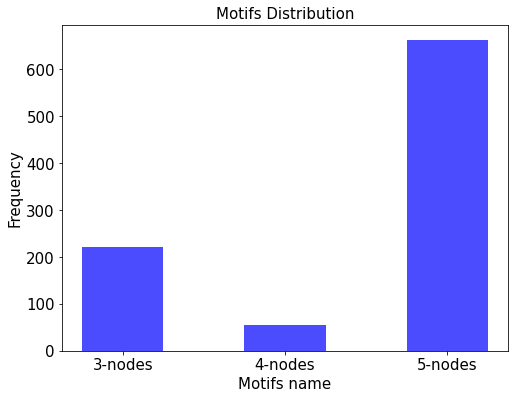

In [73]:
plt.figure(figsize=[8,6])
plt.bar(motifs_names, motifs_count,width=0.5, color='b',alpha=0.7,label="")
plt.ylabel('Frequency',fontsize=15)
plt.xlabel('Motifs name',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend()
plt.title('Motifs Distribution',fontsize=15)
plt.show()

In [7]:
folder="dataset_v5/v5_2/"
mod_ment2 = pd.read_csv(folder+'v5_2_2/'+'final_shodhganga_dataset_v5_2_2.csv', sep =",")

In [83]:
result1_1=graph.run("MATCH p=(a:Person)-[:MENTOR]->(b:Person)-[:MENTOR]->(c:Person)<-[:MENTOR]-(d:Person)<-[:MENTOR]-(e:Person) RETURN a,b,c,d,e").to_data_frame()

<py2neo.client.bolt.BoltResult object at 0x7fb3a89b7278> -1 -1


In [126]:
result1_1.sample(5,random_state=1).values

array([[Node('Person', Id='51243', name='Bano, Hamida'),
        Node('Person', Id='51237', name='Malik, Gr|Malik, G.R.'),
        Node('Person', Id='51234', name='Want, Lily'),
        Node('Person', Id='51235', name='Aslam, Mohammad'),
        Node('Person', Id='51239', name='Dhar, An')],
       [Node('Person', Id='35508', name='Balachandran, R.|Balachandra, R.'),
        Node('Person', Id='164417', name='Natarajan, R.'),
        Node('Person', Id='126647', name='Pakshi Rajan, N.'),
        Node('Person', Id='16251', name='Jeya Balaji, J.|Jeyabalaji, J.|Jaya Balaji, J.'),
        Node('Person', Id='16254', name='Cyril Kanmony, J.')],
       [Node('Person', Id='7079', name='Yadav, R. S.|Yadava, R. S.'),
        Node('Person', Id='6274', name='Prasad, Rajendra|Rajendra, Prasad'),
        Node('Person', Id='106835', name='Mahur, Ajay Kumar'),
        Node('Person', Id='6255', name='Azam, Ameer'),
        Node('Person', Id='6273', name='Srivastava, D. S.')],
       [Node('Person', Id='16

In [ ]:
[Node('Person', Id='7079', name='Yadav, R. S.|Yadava, R. S.'),
        Node('Person', Id='6274', name='Prasad, Rajendra|Rajendra, Prasad'),
        Node('Person', Id='106835', name='Mahur, Ajay Kumar'),
        Node('Person', Id='6255', name='Azam, Ameer'),
        Node('Person', Id='6273', name='Srivastava, D. S.')],

In [32]:
#result1=graph.run("MATCH p=(c:Person)<-[:MENTOR]-(a:Person)-[:MENTOR]->(b:Person)-[:MENTOR]->(c:Person) RETURN id(a),id(b),id(c)").to_data_frame()

In [134]:
mod_ment2[mod_ment2['advId']==7079]#['publisher_institution']

,advisorId,researcherId,advId,resId,advisor_name,researcher_name,publisher_dept,DepartmentId,publisher_institution,instituteId,...,new_date_awarded,dc.date.awarded,dc.subject.ddc,uniq_ddc_across_dept,dc.description.abstract,dc.title.alternative,N_DepartmentId_1,ddc_code,advisor_advId,researcher_resId
16947,7079,7121,7079,7023,"Yadav, R. S.","Anonymous, Badruddin",department of physics,D1787,Aligarh Muslim University,I292,...,1985-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1787,"('500', '530')","Yadav, R. S.@7079","Anonymous, Badruddin@7023"
16948,7079,108598,7079,108598,"Yadav, R. S.","Sharma, Nagandra Kumar",department of physics,D1787,Aligarh Muslim University,I292,...,1991-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1787,"('500', '530')","Yadav, R. S.@7079","Sharma, Nagandra Kumar@108598"
16949,7079,108616,7079,108616,"Yadav, R. S.","Yadav, Nathu Ram",department of physics,D1787,Aligarh Muslim University,I292,...,1987-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1787,"('500', '530')","Yadav, R. S.@7079","Yadav, Nathu Ram@108616"
16950,7079,108659,7079,108659,"Yadav, R. S.","Kumar, Santosh",department of physics,D1787,Aligarh Muslim University,I292,...,1978-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1787,"('500', '530')","Yadav, R. S.@7079","Kumar, Santosh@108659"
16970,7092,6274,7079,6274,"Yadava, R. S.","Prasad, Rajendra",department of physics,D1787,Aligarh Muslim University,I292,...,1978-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1787,"('500', '530')","Yadava, R. S.@7079","Prasad, Rajendra@6274"
104627,48944,189514,7079,189514,"Yadav, R. S.","Kumar, Vinod",department of political science,D1214,Kurukshetra University,I196,...,2016-07-01,NaN,300::Social sciences|320::Political science,"('300', '320')",NaN,NaN,D1214,"('300', '320')","Yadav, R. S.@7079","Kumar, Vinod@189514"
104628,48944,189515,7079,189515,"Yadav, R. S.","Mehendiratta,Kuldeep Kumar",department of political science,D1214,Kurukshetra University,I196,...,2015-07-01,NaN,300::Social sciences|320::Political science,"('300', '320')",NaN,NaN,D1214,"('300', '320')","Yadav, R. S.@7079","Mehendiratta,Kuldeep Kumar@189515"
104629,48944,189517,7079,189517,"Yadav, R. S.","Singh, Surender",department of political science,D1214,Kurukshetra University,I196,...,2015-07-01,NaN,300::Social sciences|320::Political science,"('300', '320')",NaN,NaN,D1214,"('300', '320')","Yadav, R. S.@7079","Singh, Surender@189517"


In [135]:
mod_ment2[mod_ment2['advId']==6273]#['publisher_institution']

,advisorId,researcherId,advId,resId,advisor_name,researcher_name,publisher_dept,DepartmentId,publisher_institution,instituteId,...,new_date_awarded,dc.date.awarded,dc.subject.ddc,uniq_ddc_across_dept,dc.description.abstract,dc.title.alternative,N_DepartmentId_1,ddc_code,advisor_advId,researcher_resId
14981,6273,6255,6273,6255,"Srivastava, D. S.","Azam, Ameer",department of applied physics,D1787,Aligarh Muslim University,I292,...,2002-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1499,"('500', '530')","Srivastava, D. S.@6273","Azam, Ameer@6255"
14982,6273,6273,6273,6273,"Srivastava, D. S.","Srivastava, D. S.",department of physics,D1787,Aligarh Muslim University,I292,...,1971-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1787,"('500', '530')","Srivastava, D. S.@6273","Srivastava, D. S.@6273"
14983,6273,106843,6273,106843,"Srivastava, D. S.","Singh, Padam",department of applied physics,D1787,Aligarh Muslim University,I292,...,1996-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1499,"('500', '530')","Srivastava, D. S.@6273","Singh, Padam@106843"
14984,6273,106845,6273,106845,"Srivastava, D. S.","Mujahid, Mohammad",department of applied physics,D1787,Aligarh Muslim University,I292,...,1999-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1499,"('500', '530')","Srivastava, D. S.@6273","Mujahid, Mohammad@106845"


In [48]:
#mod_ment2[mod_ment2['advId']==66327]

In [136]:
mod_ment2[mod_ment2['resId']==106835]#['title'].values

,advisorId,researcherId,advId,resId,advisor_name,researcher_name,publisher_dept,DepartmentId,publisher_institution,instituteId,...,new_date_awarded,dc.date.awarded,dc.subject.ddc,uniq_ddc_across_dept,dc.description.abstract,dc.title.alternative,N_DepartmentId_1,ddc_code,advisor_advId,researcher_resId
14951,6255,106835,6255,106835,"Azam, Ameer","Mahur, Ajay Kumar",department of applied physics,D1787,Aligarh Muslim University,I292,...,2008-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1499,"('500', '530')","Azam, Ameer@6255","Mahur, Ajay Kumar@106835"
14986,6274,106835,6274,106835,"Prasad, Rajendra","Mahur, Ajay Kumar",department of applied physics,D1787,Aligarh Muslim University,I292,...,2008-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1499,"('500', '530')","Prasad, Rajendra@6274","Mahur, Ajay Kumar@106835"
14995,6277,106835,6277,106835,"Azam, Ammer","Mahur, Ajay Kumar",department of applied physics,D1787,Aligarh Muslim University,I292,...,2008-07-01,NaN,500::Natural sciences & mathematics|530::Physics,"('500', '530')",NaN,NaN,D1499,"('500', '530')","Azam, Ammer@6277","Mahur, Ajay Kumar@106835"
